### Problem Statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

    Undergrad : person is under graduated or not
    Marital.Status : marital status of a person
    Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban : Whether that person belongs to urban area or not

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

import seaborn as sns

In [3]:
Fraud_check_data = pd.read_csv('Fraud_check.csv')
Fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Fraud_check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
Fraud_check_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


### Visualization

<AxesSubplot:>

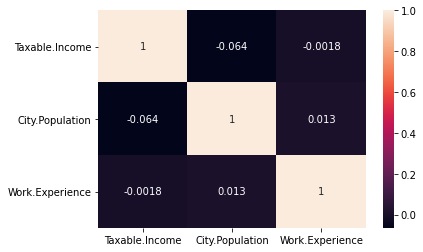

In [6]:
plt.figure(figsize = (6,4))
sns.heatmap(Fraud_check_data.corr(), annot = True)

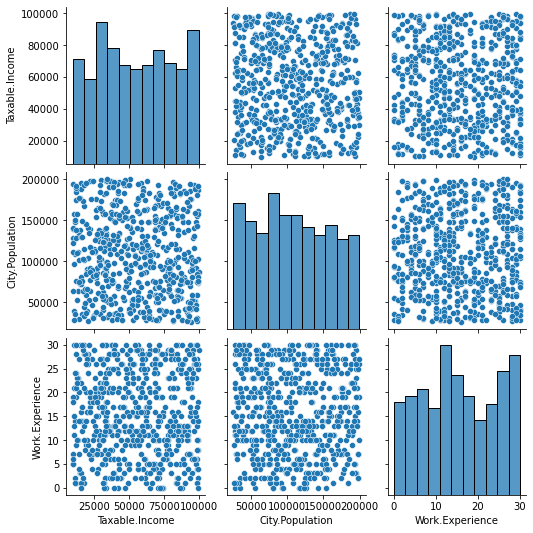

In [7]:
sns.pairplot(Fraud_check_data)
plt.show()

In [8]:
Fraud_check_data['Risky'] = Fraud_check_data['Taxable.Income'].map(lambda x: 1 if x > 30000 else 0)
Fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1
596,YES,Divorced,69967,55369,2,YES,1
597,NO,Divorced,47334,154058,0,YES,1
598,YES,Married,98592,180083,17,NO,1


In [9]:
Fraud_check_data.Risky.value_counts()

1    476
0    124
Name: Risky, dtype: int64

In [10]:
for col in Fraud_check_data.columns:
    print(f'{col} : {Fraud_check_data[col].unique()}')

Undergrad : ['NO' 'YES']
Marital.Status : ['Single' 'Divorced' 'Married']
Taxable.Income : [68833 33700 36925 50190 81002 33329 83357 62774 83519 98152 29732 61063
 11794 61830 64070 69869 24987 39476 97957 10987 88636 14310 78969 92040
 38239 31417 55299 87778 10379 94033 73854 64007 97200 82071 12514 31336
 10163 68513 14912 74010 50777 49436 96485 70339 33614 81079 31532 44034
 16264 45706 79616 40137 97703 21917 81939 19925 34703 78573 10870 65065
 94418 26972 91684 51685 62158 58312 42507 61486 10150 99619 89302 94287
 41344 41382 32434 61105 67628 31458 73411 10329 44947 35610 66564 87348
 69098 28449 39277 13747 86652 26741 77634 99325 85651 15296 10348 41395
 22258 79583 22187 52495 93078 35072 32662 89250 41641 55873 19169 46629
 51927 69224 24557 77762 96355 90910 21945 79357 42784 54638 29944 97318
 52022 20391 21016 26679 70682 87326 15853 75501 97984 53378 93458 56501
 46955 33492 35832 12470 53981 22773 84691 50087 27877 56647 59419 26783
 79453 33962 84429 63057 43128 40

In [11]:
Fraud_check_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Risky               int64
dtype: object

In [12]:
data =pd.get_dummies(Fraud_check_data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
data.head()

,Taxable.Income,City.Population,Work.Experience,Risky,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,1,0,0,1,1
1,33700,134075,18,1,1,0,0,1
2,36925,160205,30,1,0,1,0,1
3,50190,193264,15,1,1,0,1,1
4,81002,27533,28,1,0,1,0,0


### Feature scalling

In [13]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
data_norm = norm_func(data).round(3)
data_norm

,Taxable.Income,City.Population,Work.Experience,Risky,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.656,0.139,0.333,1.0,0.0,0.0,1.0,1.0
1,0.264,0.622,0.600,1.0,1.0,0.0,0.0,1.0
2,0.300,0.773,1.000,1.0,0.0,1.0,0.0,1.0
3,0.448,0.963,0.500,1.0,1.0,0.0,1.0,1.0
4,0.792,0.010,0.933,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
595,0.740,0.079,0.233,1.0,1.0,0.0,0.0,1.0
596,0.669,0.170,0.067,1.0,1.0,0.0,0.0,1.0
597,0.417,0.737,0.000,1.0,0.0,0.0,0.0,1.0
598,0.989,0.887,0.567,1.0,1.0,1.0,0.0,0.0


In [15]:
X = data_norm.drop('Risky', axis = 1)
y = data_norm.Risky
X.shape, y.shape

((600, 7), (600,))

### train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 7), (120, 7), (480,), (120,))

### Training the model

In [22]:
model = RandomForestClassifier(n_estimators=200,class_weight= 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

1.0

In [23]:
print('Accuracy Score {} :' .format(accuracy_score(y_test, y_pred)))

Accuracy Score 1.0 :


In [26]:
print('ROC_AUC Score {} :'.format(roc_auc_score(y_test, y_pred)))

ROC_AUC Score 1.0 :


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        95

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

